#Gradient Descent

Often in data science you are trying to solve some sort of optimization problem, and often you will have to solve them from scratch. Our approach to these problems is *gradient descent*, which lends itself pretty well to a from-scratch treatment.

###The Idea Behind Gradient Descent

Suppose we have some funcion **f** that takes as input a vector of real numbers and outputs a single real number. Pne simple such function is:

In [30]:
def sum_of_squares(v):
    """computes the sum of squared elemets in v"""
    return sum(v_i ** 2 for v_i in v)

* Frequently we will need to maximize or minimize such functions. That is, we need to find the input **v** that produces the largest possible value

* For functions like the one we are working on, the *gradient* (this is the vector of partial derivatives), gives the input direcction in which the function most quickly increases

* One apporach to maximizing a functino is to pick a random starting point, compute the gradient, take a small step in the direction of the gradient( ie the direction that causes the function to increase the most), and repeat with the new starting point. Similarly, you can try to minimize a function by taking small steps in the *opposite* direction.

\* If a function has a unique global minimum, this procedure is likely to find it. If a function has multiple local minima, this procedure might "find" the worng one of them, in which case you might rerun the procedure from a variety of starting points. If a function has no minimum, thin it's possible the procedure might go on forever

###Estimating the Gradient

If **f** if a function of one variable, its derivative at a point **x**, measures how **f(x)** changes when we make a small change to **x**. It is defined as the limit of difference quotients:

In [31]:
import math, random

In [32]:
from collections import Counter

In [33]:
from __future__ import division

In [34]:
def difference_quotient(f, x, h):
    return (f(x + h) - f(x)) / h

#as h approches 0

* The derivative is the slope of the tangent line at **(x, f(x))**, while the difference quotient is the slope of the not-quite-tangent line that runs through **(x + h, f(x + h))**. As *h* gets smaller and smaller, the not-quite-tangent line gets closer and closer to the tangent line. Here is an approximate photo:

<img src='gradient.png'/>

* For a lot of functions it is pretty simple to calculate the derivative, such as the square function

In [35]:
def square(x):
    return x * x

In [36]:
def derivative(x):
    return 2 * x

* What if we couldn't find the gradient? You cannot take limits in Python (unless you use SymPy), however we can estimate the derivatives by evaluating the defference quotient for a very small *e*.

In [43]:
from functools import partial

In [38]:
derivative_estimate = partial(difference_quotient, square, h=0.00001)

In [39]:
derivative_estimate = lambda x: difference_quotient(square, x, h=0.00001)

In [40]:
import matplotlib.pyplot as plt

In [41]:
%matplotlib inline

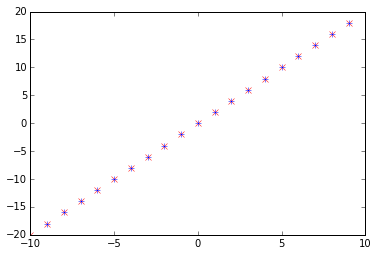

In [45]:
#plt.title("Actual Derivatives vs. Estimates")
x = range(-10,10)
plt.plot(x, list(map(derivative, x)), 'rx')           # red  x
plt.plot(x, list(map(derivative_estimate, x)), 'b+')
#plt.legend(loc=9)

* When **f** is a function of many variables, it has multiple *partial derivatives* each indicating how **f** changes when we make small changes in just one of the input variables
* We calculate its ith partial derivative by treating it as a function of just its ith variable holding the other variables fixed:

In [47]:
def partial_difference_quotient(f, v, i, h):
    """compute the ith partial difference quotient of f at v"""
    w = [v_j + (h if j==i else 0)
         for j, v_j in enumerate(v)]
    return (f(w) - f(v)) / h

* After that we can estimate the gradient the same way

In [48]:
def estimate_gradient(f, v, h=0.00001):
    return [partial_difference_quotient(f, v, i, h)
            for i, _ in enumerate(v)]

\* This method has the drawback of being computationally intensive

###Using the Gradient

It's easy to see that the **sum_of_squares** function is smallest when its input **v** is a vector of zeros. But imagin we didn't know that. Let's try and use gradients to find the minimum among all three-dimensional vectors. We'll just pick a random staring point and then take tiny steps in the opposite direction of the gradient until we reach a point where the gradient is very small:

In [49]:
def step(v, direction, step_size):
    """move step_size in the direction from v"""
    return [v_i + step_size * direction_i
           for v_i, direction_i in zip(v, direction)]

In [75]:
def sum_of_squares_gradient(v):
    return [2 * v_i for v_i in v]

In [94]:
# pick a random starting point
v = [random.randint(-10,10) for i in range(3)]

In [95]:
tolerance = .01

In [96]:
# we need our distance equation from the linear algebra chapter
def vector_subtract(v, w):
    """subtracts the corresponding elements"""
    return [v_i - w_i
            for v_i, w_i in zip(v,w)]
def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i
               for v_i, w_i in zip(v,w))
def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n """
    return dot(v, v)
def magnitude(v):
    return math.sqrt(sum_of_squares(v))
def distance(v, w):
    return magnitude(vector_subtract(v, w))

In [97]:
while True:
    gradient = sum_of_squares_gradient(v) #compute the gradient at v
    next_v = step(v, gradient, -0.01)  #take a negative gradient step
    if distance(next_v, v) < tolerance: #stop if we're converging
        break
    print(v)  # Lets interactively see whats happening here
    v = next_v        #continue if we're not

[-4, -4, 4]
[-3.92, -3.92, 3.92]
[-3.8416, -3.8416, 3.8416]
[-3.764768, -3.764768, 3.764768]
[-3.68947264, -3.68947264, 3.68947264]
[-3.6156831872, -3.6156831872, 3.6156831872]
[-3.543369523456, -3.543369523456, 3.543369523456]
[-3.47250213298688, -3.47250213298688, 3.47250213298688]
[-3.4030520903271424, -3.4030520903271424, 3.4030520903271424]
[-3.3349910485205996, -3.3349910485205996, 3.3349910485205996]
[-3.2682912275501876, -3.2682912275501876, 3.2682912275501876]
[-3.202925402999184, -3.202925402999184, 3.202925402999184]
[-3.1388668949392002, -3.1388668949392002, 3.1388668949392002]
[-3.076089557040416, -3.076089557040416, 3.076089557040416]
[-3.0145677658996077, -3.0145677658996077, 3.0145677658996077]
[-2.9542764105816155, -2.9542764105816155, 2.9542764105816155]
[-2.8951908823699832, -2.8951908823699832, 2.8951908823699832]
[-2.8372870647225836, -2.8372870647225836, 2.8372870647225836]
[-2.7805413234281318, -2.7805413234281318, 2.7805413234281318]
[-2.724930496959569, -2.7249

In [92]:
print(v)

[-0.20114960951056973, -0.05028740237764243, -0.45258662139878214]


* The lower the tolerance the closer we will get to a vector of zeros

###Choosing the Right Step Size

The rationale for moving against the gradient is clear, but choosing the right step size can be tricky

* There are several options for this:
    * Using a fixed step size
    * Gradually shrinking the step size over time
    * At each step, choosing the step size that minimizes the value of the objective function

* The last option is the most effective, but most computationally intensive

* We must be aware, that certain step sizes may cause invalid inputs for our function. To get around this we must return infinity for invalid inputs

In [98]:
def safe(f):
    """Returns a new function that is the same as f, except when f produces an error it outpus infinity"""
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf')     #this means infinity in python
    
    return safe_f

###Putting It All Together